## Import the required packages

In [2]:
# importing required packages
# data operation libraries

import numpy as np
import pandas as pd
# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
# plt.style.use('seaborn-white')

# the blow code hide the python warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Load the dataset 

In [3]:
#Read the csv file
dataset1 = pd.read_csv(r'dataset/auto-mpg.csv')

dataset1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
#checking the data types of each columns
dataset1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower          str
weight            int64
acceleration    float64
model year        int64
origin            int64
car name            str
dtype: object

## Replacing special characters values to null

Few columns in the dataset contains special characters like . and ? as a value. Inorder to convert the horsepower column to float value we have to replace such values to null. 

In [5]:
#confirming the dataset has all valid values. In the displayed value there is a "?" in the data. Same do 
#for all the columns
np.unique(dataset1.horsepower)

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [6]:
dot_mask = dataset1 == '?'
dot_mask

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [7]:
dataset1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='str')

In [8]:
# Iterate through True values in the mask
for row, col in zip(*dot_mask.to_numpy().nonzero()):
    print(f"Row {row}, Column '{dataset1.columns[col]}' contains '?'")


Row 32, Column 'horsepower' contains '?'
Row 126, Column 'horsepower' contains '?'
Row 330, Column 'horsepower' contains '?'
Row 336, Column 'horsepower' contains '?'
Row 354, Column 'horsepower' contains '?'
Row 374, Column 'horsepower' contains '?'


In [9]:
# we found "?" and "." values inside the column. 
# First we replace them with null values then we drop it using dropna()
from numpy import nan

#dataset1.replace('.', nan, inplace=True)
dataset1.replace('?', nan, inplace=True)

#dataset1 = dataset1.replace('?', nan)

dataset1 = dataset1.dropna()
dataset1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
dataset1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
dataset1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower          str
weight            int64
acceleration    float64
model year        int64
origin            int64
car name            str
dtype: object

In [12]:
# the column horsepower contains float values. However its datatype is showing object. 
#A datatype of object typically means that the column contains
#string values, mixed data types, or even non-standard Python objects.
#in this case since the "?" was there in the value it become object. Now we have removed it
#So we are going to convert that column to float
dataset1["horsepower"] = dataset1["horsepower"].astype(float)
dataset1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name            str
dtype: object

In [13]:
dataset1.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [14]:
dataset1.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

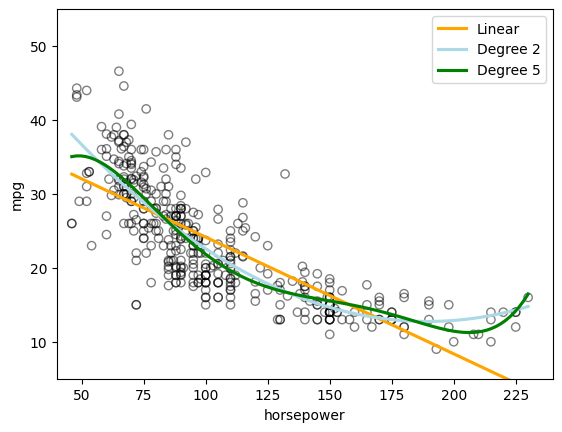

In [15]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
# By deafult if you havent specify any order it will plot a linear model with order=1.
#order: This parameter specifies the order of the polynomial regression
# REGPLOT()::used to plot data and a linear regression model fit. I
#It combines a scatter plot of the data points with a regression line representing the relationship between two variables.
# Here facecolor= None means that the markers will have no interior fill and will appear as hollow shapes. 
# Here edgecolors='k' means The edges of the markers are black. 
plt.scatter(dataset1.horsepower, dataset1.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x=dataset1.horsepower, y=dataset1.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=dataset1.horsepower, y=dataset1.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x=dataset1.horsepower, y=dataset1.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
#sns.regplot(x=dataset1.horsepower, y=dataset1.mpg, ci=None, label='Degree 70', order=70, scatter=False, color='r')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);


# mpg = b0 + b1*hp
# mpg= bo + b1 * hp + b2 *hp2
# mpg = bo + b1 * hp + b2 *hp2 + b3 * hp3

In [16]:
# we are creating the new columns or new predictors
#dataset1['horsepower2'] = dataset1.horsepower**2
dataset1['horsepower2'] =dataset1.loc[:, "horsepower"]**2
#dataset1.loc[:, "horsepower2"] = dataset1.loc[:, "horsepower"]**2
dataset1.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


## Using statsmodel package

In [17]:
est = smf.ols('mpg ~ horsepower ', dataset1).fit()
est.summary().tables[1]
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        11:27:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
est = smf.ols('mpg ~ horsepower + horsepower2', dataset1).fit()
est.summary().tables[1]
#est.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [24]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           5.40e-99
Time:                        11:37:36   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#With degree 3
#dataset1['horsepower2'] = dataset1.horsepower**2
dataset1['horsepower3'] = dataset1.loc[:, "horsepower"]**3
#dataset1.loc[:, "horsepower2"] = dataset1.loc[:, "horsepower"]**2
dataset1.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower2,horsepower3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,2197000.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,4492125.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,3375000.0


In [26]:
est1 = smf.ols('mpg ~ horsepower +horsepower2 + horsepower3', dataset1).fit()
est1.summary().tables[1]
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           8.41e-98
Time:                        11:38:21   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.6848      4.563     13.298      0.000      51.713      69.657
horsepower     -0.5689      0.118     -4.824      0.000      -0.801      -0.337
horsepower2     0.0021      0.001      2.193      0.029       0.000       0.004
horsepower3 -2.147e-06   2.38e-06     -0.903      0.367   -6.82e-06    2.53e-06
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.528
Skew:                           0.204   Prob(JB):                     3.18e-08
Kurtosis:                       4.395   Cond. No.                     5.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
est2 = smf.ols('mpg ~ horsepower + horsepower2 + weight', dataset1).fit()
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     367.4
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          5.69e-113
Time:                        11:31:14   Log-Likelihood:                -1097.4
No. Observations:                 392   AIC:                             2203.
Df Residuals:                     388   BIC:                             2219.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      55.9864      1.649     33.953      0.000      52.744      59.228
horsepower     -0.2838      0.035     -8.067      0.000      -0.353      -0.215
horsepower2     0.0008      0.000      7.040      0.000       0.001       0.001
weight         -0.0045      0.001     -8.809      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       22.222   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.939
Skew:                           0.433   Prob(JB):                     1.16e-07
Kurtosis:                       4.097   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
dataset1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'horsepower2',
       'horsepower3'],
      dtype='str')

In [23]:
est2 = smf.ols('mpg ~ horsepower + horsepower2  + displacement + acceleration ', dataset1).fit()
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     289.3
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          7.60e-115
Time:                        11:31:43   Log-Likelihood:                -1090.0
No. Observations:                 392   AIC:                             2190.
Df Residuals:                     387   BIC:                             2210.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       67.7332      3.025     22.391      0.000      61.786      73.681
horsepower      -0.4262      0.034    -12.388      0.000      -0.494      -0.359
horsepower2      0.0012      0.000     10.724      0.000       0.001       0.001
displacement    -0.0269      0.005     -5.961      0.000      -0.036      -0.018
acceleration    -0.6145      0.104     -5.914      0.000      -0.819      -0.410
==============================================================================
Omnibus:                       39.465   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.009
Skew:                           0.651   Prob(JB):                     2.08e-14
Kurtosis:                       4.470   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using scikitlearn package

In [27]:
regr = skl_lm.LinearRegression()

# Linear fit mpg= b0+ hp *b1
X = dataset1.horsepower.values.reshape(-1,1)
y = dataset1.mpg
regr.fit(X, y)

dataset1['pred1'] = regr.predict(X)
dataset1['resid1'] = dataset1.mpg - dataset1.pred1

# Quadratic fit  mpg= b0+ hp *b1 + b2 * hp^2
X2 = dataset1[['horsepower', 'horsepower2']].values
regr.fit(X2, y)

dataset1['pred2'] = regr.predict(X2)
dataset1['resid2'] = dataset1.mpg - dataset1.pred2




In [28]:
dataset1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower2,horsepower3,pred1,resid1,pred2,resid2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,2197000.0,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,4492125.0,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,3375000.0,16.259151,1.740849,14.658717,3.341283
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0,3375000.0,16.259151,-0.259151,14.658717,1.341283
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0,2744000.0,17.837598,-0.837598,15.752059,1.247941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,7396.0,636056.0,26.361214,0.638786,25.908837,1.091163
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,2704.0,140608.0,31.727935,12.272065,35.985609,8.014391
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,7056.0,592704.0,26.676903,5.323097,26.422834,5.577166
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,6241.0,493039.0,27.466127,0.533873,27.750895,0.249105


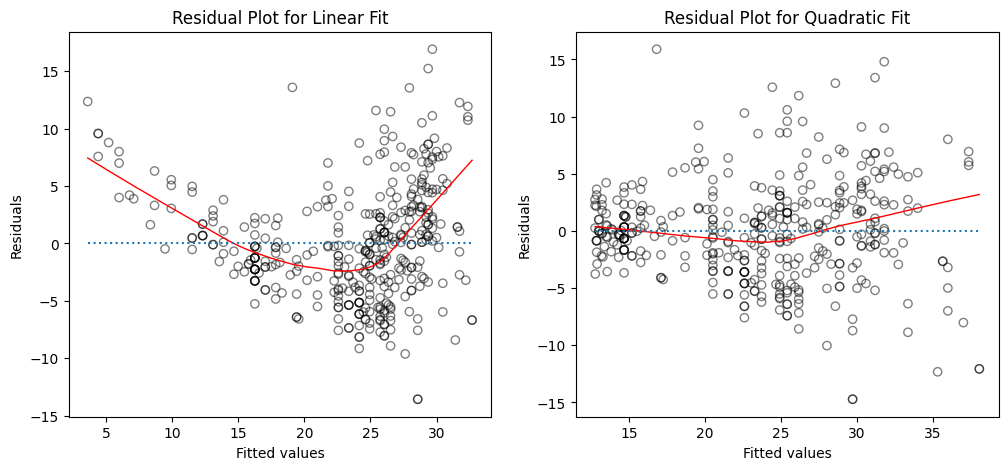

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(x=dataset1.pred1, y=dataset1.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(x=dataset1.pred2, y=dataset1.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

In [ ]:
#Here in the above plot instead of mpg vs horsepower we plotted the predicted vs residuals(actual-predicted)
#in the first subplot we used only linear model, there you can see the predicted vs residual form a pattern. 
# It means that it is not representing the data very well. 
# In the second subplot we used horspower^2 as one of the predictor then it bcome a polynomial regression
# In that case if you plot the predicted vs residual, there is no pattern. all the values are scattered. Then it shows a good fit.